In [1]:
import numpy as np

## Part 1: The Theory of Newton's Divided Difference

#### **A. The Core Concept: The Newton Form of a Polynomial**

*   **Theory:** The Newton form expresses the interpolating polynomial, $p_n(x)$, as a sum of terms where each new term adds the influence of one more data point.
    
    $$ p_n(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)\dots(x-x_{n-1}) $$
*   **Analysis:**
    *   The first term, $a_0$, is a degree-0 polynomial that matches the first point.
    *   The first two terms, $a_0 + a_1(x-x_0)$, form a degree-1 polynomial (a line) that matches the first two points.
    *   Each successive term is built upon the previous ones.

#### **B. The Building Blocks: Divided Differences**

*   **Theory:** The coefficients $a_0, a_1, \dots, a_n$ are the **divided differences**. They are denoted by $f[x_0, x_1, \dots, x_k]$.
    *   $a_0 = f[x_0] = y_0$
    *   $a_1 = f[x_0, x_1]$
    *   $a_2 = f[x_0, x_1, x_2]$
    *   and so on...

*   **Recursive Calculation:** This is the heart of the method. Divided differences are calculated recursively:
    *   **Zeroth divided difference:** $f[x_i] = y_i$
    *   **First divided difference:** $f[x_i, x_j] = \frac{f[x_j] - f[x_i]}{x_j - x_i}$
    *   **Second divided difference:** $f[x_i, x_j, x_k] = \frac{f[x_j, x_k] - f[x_i, x_j]}{x_k - x_i}$
    *   **General form:** $f[x_i, \dots, x_j] = \frac{f[x_{i+1}, \dots, x_j] - f[x_i, \dots, x_{j-1}]}{x_j - x_i}$

#### **C. The Divided Difference Table**

*   **Theory:** The recursive calculations are organized into a triangular table. For four points, it looks like this:

| $x_i$ | $f[x_i]$ | $f[x_i, x_{i+1}]$ | $f[x_i, x_{i+1}, x_{i+2}]$ | $f[x_0, \dots, x_3]$ |
| :--- | :--- | :--- | :--- | :--- |
| $x_0$ | **$y_0$** | | | |
| | | **$f[x_0, x_1]$** | | |
| $x_1$ | $y_1$ | | **$f[x_0, x_1, x_2]$** | |
| | | $f[x_1, x_2]$ | | **$f[x_0, x_1, x_2, x_3]$** |
| $x_2$ | $y_2$ | | $f[x_1, x_2, x_3]$ | |
| | | $f[x_2, x_3]$ | | |
| $x_3$ | $y_3$ | | | |

*   **The Coefficients:** The coefficients needed for the Newton polynomial, $a_0, a_1, a_2, \dots, a_n$, are simply the **top diagonal** of this table (highlighted in bold).

---

## Part 2: Implementation

### A. The `calc_div_diff(x, y)` Function - The Coefficient Factory

In [2]:
import numpy as np

def calc_div_diff(x, y):
    """
    Computes the coefficients for the Newton interpolating polynomial using the Divided Difference method.

    Args:
      x (list or np.ndarray): The x-coordinates of the data points.
      y (list or np.ndarray): The y-coordinates of the data points.

    Returns:
      (np.ndarray): An array containing the coefficients a_0, a_1, ..., a_n.
    """
    # Ensure inputs are NumPy arrays for consistent operations.
    x = np.array(x, dtype=np.float64)
    y = np.array(y, dtype=np.float64)


    n = len(x) # n is the number of data points.

    b = np.zeros((n, n)) # Create an n x n matrix to hold the divided difference table. We'll use the variable name 'b' as used in many textbooks.

    # Step 1: The first column of the table is simply the y-values.
    # b[:, 0] selects all rows (:) in the first column (0).
    b[:, 0] = y

    # Step 2: Use nested loops to fill the rest of the table.
    # The outer loop 'j' iterates through the columns (from 1 to n-1). This corresponds to the order of the divided difference (1st, 2nd, etc.).

    for j in range(1, n):
        # The inner loop 'i' iterates through the rows for that column. The number of entries decreases by one for each column.

        for i in range(n - j):
            # Apply the recursive formula:
            # f[x_i, ..., x_{i+j}] = ( f[x_{i+1}, ..., x_{i+j}] - f[x_i, ..., x_{i+j-1}] ) / ( x_{i+j} - x_i ) # In our table 'b', this translates to:

            numerator = b[i+1, j-1] - b[i, j-1]
            denominator = x[i+j] - x[i]
            b[i, j] = numerator / denominator

    print("--- Full Divided Difference Table ---\n", b, sep = '') # This is just to check; remove if necessary

    coefficients = b[0, :] # Step 3: The coefficients are the first row of the table.

    return coefficients

In [3]:
# --- Test for calc_div_diff ---
data_x = [-3., -2., -1., 0., 1., 3., 4.]
data_y = [-60., -80., 6., 1., 45., 30., 16.]

# Calculate the coefficients
newton_coeffs = calc_div_diff(data_x, data_y)

print("\n--- Extracted Coefficients (Top Diagonal) ---")
print(newton_coeffs)

# --- Verification ---
expected_coeffs = np.array([-60., -20., 53., -32.833333, 14.041667, -3.465278, 0.723214])
np.testing.assert_array_almost_equal(newton_coeffs, expected_coeffs, decimal=4)
print("\ncalc_div_diff function works correctly!")

--- Full Divided Difference Table ---
[[-60.         -20.          53.         -32.83333333  14.04166667
   -3.46527778   0.72321429]
 [-80.          86.         -45.5         23.33333333  -6.75
    1.59722222   0.        ]
 [  6.          -5.          24.5        -10.41666667   2.83333333
    0.           0.        ]
 [  1.          44.         -17.16666667   3.75         0.
    0.           0.        ]
 [ 45.          -7.5         -2.16666667   0.           0.
    0.           0.        ]
 [ 30.         -14.           0.           0.           0.
    0.           0.        ]
 [ 16.           0.           0.           0.           0.
    0.           0.        ]]

--- Extracted Coefficients (Top Diagonal) ---
[-60.         -20.          53.         -32.83333333  14.04166667
  -3.46527778   0.72321429]

calc_div_diff function works correctly!


### B. The `Newtons_Divided_Differences` Class - The Polynomial Builder

In [4]:
class Newtons_Divided_Differences:
  def __init__(self, differences, data_x):
    """
    Initializes a Newton's Polynomial object.

    Args:
      differences (list or np.ndarray): The coefficient vector [a0, a1, ...].
      data_x (list or np.ndarray): The original x-coordinates of the data points.
    """
    self.differences = np.array(differences, dtype=np.float64)
    self.data_x = np.array(data_x, dtype=np.float64)

  def n(self, k, x):
    """
    Calculates the k-th Newton basis product term, n_k(x).
    n_k(x) = (x-x_0) * (x-x_1) * ... * (x-x_{k-1})

    Args:
      k (int): The index of the basis term (corresponds to a_k).
      x (float or np.ndarray): The value(s) at which to evaluate.

    Returns:
      (float or np.ndarray): The value of the basis product.
    """

    result = 1.0 # Initialize the product to 1. This also handles the base case k=0.

    # Loop from j=0 up to k-1.
    for j in range(k):
      result *= (x - self.data_x[j])

    return result

  def __call__(self, x):
    """
    Evaluates the full Newton polynomial at a given x or for an array of x values.

    Args:
      x (float or np.ndarray): The value(s) at which to evaluate the polynomial.

    Returns:
      (float or np.ndarray): The result of the evaluation.
    """

    p_x = np.zeros_like(x, dtype=np.float64) # Initialize the result (sum) to zero. We use np.zeros_like(x) to ensure our result array has the same shape.

    # Loop through each term of the polynomial summation
    for k in range(len(self.differences)):

      a_k = self.differences[k] # Get the coefficient a_k

      n_k_x = self.n(k, x) # Calculate the basis product n_k(x)

      p_x += a_k * n_k_x # Add the full term (a_k * n_k(x)) to the sum

    return p_x

  # Horner's method version (for your reference)
  def __call__horner(self, x):
    n = len(self.differences) - 1
    p_x = self.differences[n] # Start with the highest coefficient
    for k in range(n - 1, -1, -1): # Loop backwards
        p_x = p_x * (x - self.data_x[k]) + self.differences[k]
    return p_x



In [6]:
# --- Test for __init__ ---
# Use the coefficients and data from the previous test
p_newton = Newtons_Divided_Differences(newton_coeffs, data_x)

# Check the attributes
print("\n--- Testing the Constructor ---")
print("Stored coefficients (differences):", p_newton.differences)
print("Stored data_x points:", p_newton.data_x)

# --- Verification ---
np.testing.assert_array_almost_equal(p_newton.differences, expected_coeffs, decimal=4)
np.testing.assert_array_equal(p_newton.data_x, data_x)
print("\n__init__ method works correctly!")


--- Testing the Constructor ---
Stored coefficients (differences): [-60.         -20.          53.         -32.83333333  14.04166667
  -3.46527778   0.72321429]
Stored data_x points: [-3. -2. -1.  0.  1.  3.  4.]

__init__ method works correctly!


In [7]:
# --- Test for n(self, k, x) ---
# Use the object we created earlier
# p_newton = Newtons_Divided_Differences(newton_coeffs, data_x)

print("\n--- Testing the Basis Product Helper n(k, x) ---")
# Let's test at x = 2
x_test = 2.0

# n_0(2) should be 1
n0 = p_newton.n(0, x_test)
print(f"n_0(2) = {n0}")
assert n0 == 1.0

# n_1(2) should be (x - x_0) = (2 - (-3)) = 5
n1 = p_newton.n(1, x_test)
print(f"n_1(2) = {n1}")
assert n1 == 5.0

# n_2(2) should be (x - x_0)(x - x_1) = (2 - (-3))*(2 - (-2)) = 5 * 4 = 20
n2 = p_newton.n(2, x_test)
print(f"n_2(2) = {n2}")
assert n2 == 20.0

print("\nn(k, x) method works correctly!")


--- Testing the Basis Product Helper n(k, x) ---
n_0(2) = 1.0
n_1(2) = 5.0
n_2(2) = 20.0

n(k, x) method works correctly!


In [8]:
# --- Test for __call__ ---
# Use the object we created earlier
# p_newton = Newtons_Divided_Differences(newton_coeffs, data_x)

print("\n--- Testing the __call__ Method ---")

# Evaluate the polynomial at the original data points
y_predicted = p_newton(data_x)

print("Original y-values:", data_y)
print("Predicted y-values:", y_predicted)

# --- Verification ---
# The predicted values should be almost identical to the original y-values.
np.testing.assert_array_almost_equal(y_predicted, data_y)
print("\n__call__ method works correctly! The polynomial interpolates the data points.")


--- Testing the __call__ Method ---
Original y-values: [-60.0, -80.0, 6.0, 1.0, 45.0, 30.0, 16.0]
Predicted y-values: [-60. -80.   6.   1.  45.  30.  16.]

__call__ method works correctly! The polynomial interpolates the data points.


## Part 3: Simple problem solving & Plotting

Suppose, you have three nodes: `(−1.5, 3.75 )`, `( 0.5, 1.22 )`, and `( 1.67, 2.9 )`.

Using the Newton's Divided Difference method that you have implemented:
1. Calculate the coefficients of the interpolating polynomial.
2. Construct the polynomial.
3. Print out the value of the interpolating polynomial at **x = 0.25**.

--- Solving Daily Evaluation ---
--- Full Divided Difference Table ---
[[ 3.75       -1.265       0.85201812]
 [ 1.22        1.43589744  0.        ]
 [ 2.9         0.          0.        ]]

Calculated Coefficients (a0, a1, a2): [ 3.75       -1.265       0.85201812]

Constructed Polynomial Object.

The value of the interpolating polynomial at x = 0.25 is: 1.16349207
--- Full Divided Difference Table ---
[[-3.00000000e+01 -5.00000000e+00  3.93333333e+01 -2.86060606e+01
   6.57892652e+00 -8.43651555e-01  8.65809514e-02]
 [-5.00000000e+01  1.72000000e+02 -1.18000000e+02  2.73148148e+01
  -3.54489214e+00  3.68481765e-01  0.00000000e+00]
 [ 3.60000000e+01 -5.00000000e+00  4.91666667e+00 -1.04432234e+00
   1.39925503e-01  0.00000000e+00  0.00000000e+00]
 [ 3.10000000e+01  1.46666667e+01 -2.91575092e+00  2.84969932e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.50000000e+01 -4.28571429e+00 -4.93506494e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.0000

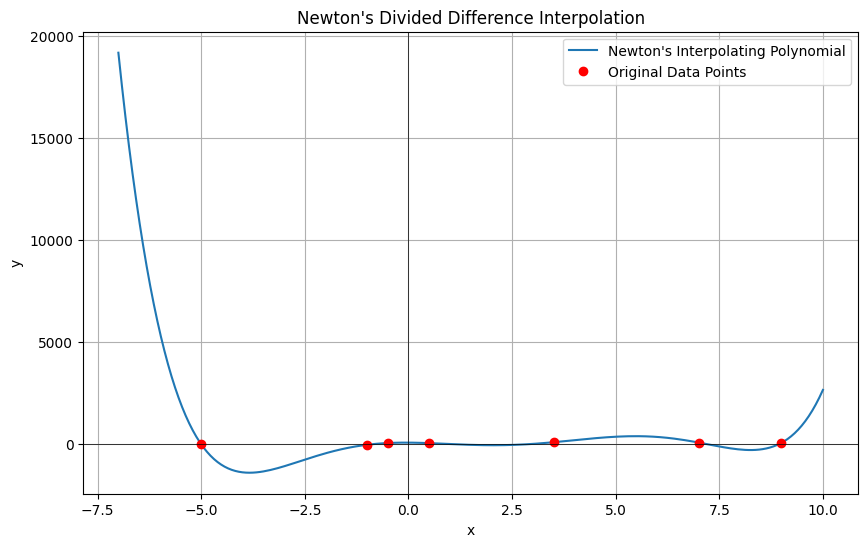

In [9]:
import matplotlib.pyplot as plt

#==============================================================================
# Part 1: Solving the Daily Evaluation Problem
#==============================================================================

# --- Step 0: Define the given data ---
eval_x = [-1.5, 0.5, 1.67]
eval_y = [3.75, 1.22, 2.9]

# --- Step 1: Calculate the coefficients using our factory function ---
print("--- Solving Daily Evaluation ---")
eval_coeffs = calc_div_diff(eval_x, eval_y)
print("\nCalculated Coefficients (a0, a1, a2):", eval_coeffs)

# --- Step 2: Build the Newton's Polynomial object ---
p_eval = Newtons_Divided_Differences(eval_coeffs, eval_x)
print("\nConstructed Polynomial Object.")

# --- Step 3: Evaluate the polynomial at x = 0.25 ---
value_at_0_25 = p_eval(0.25)
print(f"\nThe value of the interpolating polynomial at x = 0.25 is: {value_at_0_25:.8f}")


#==============================================================================
# Part 2: Plotting the Polynomial from the Lab's Main Example
#==============================================================================

# Use the data from the main example in the lab file to generate the plot
data_x_plot = np.array([-5., -1, -0.5, 0.5, 3.5, 7., 9])
data_y_plot = np.array([-30., -50., 36., 31., 75., 60., 46.])

# Calculate coefficients and create the polynomial object for this data
plot_coeffs = calc_div_diff(data_x_plot, data_y_plot)
p_plot = Newtons_Divided_Differences(plot_coeffs, data_x_plot)

# 1. Generate a dense set of x-values for a smooth curve.
# We go slightly beyond the original data range for a better view.
x_curve = np.linspace(-7, 10, 200)

# 2. Evaluate the polynomial for these x-values to get the y-values.
y_curve = p_plot(x_curve)

# 3. Create the plot
print("\n--- Generating Plot ---")
plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, label="Newton's Interpolating Polynomial")

# 4. Plot the original data points as red circles to verify the fit.
plt.plot(data_x_plot, data_y_plot, 'ro', label='Original Data Points')

# 5. Add labels, title, and grid for clarity.
plt.title("Newton's Divided Difference Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# 6. Show the plot.
plt.show()